# Self-evaluation
In this notebook we prompt a model to describe an image and then evaluate the description.

This involves using an image as a [scenario](https://docs.expectedparrot.com/en/latest/scenarios.html) of survey questions, and [piping](https://docs.expectedparrot.com/en/latest/notebooks/piping_comments.html) the answer to a question into another question.

We also show how to use [FileStore](https://docs.expectedparrot.com/en/latest/filestore.html) to post and retrieve files to [Coop](https://docs.expectedparrot.com/en/latest/coop.html) for ease of sharing data and other content used with surveys.

Please see the [docs](https://docs.expectedparrot.com) for more examples and details on all of these methods.

New: Polly Link: [https://www.expectedparrot.com/polly/share/54458464-7b42-4a01-af8c-00d3ddd8138f](https://www.expectedparrot.com/polly/share/54458464-7b42-4a01-af8c-00d3ddd8138f)

In [1]:
from edsl import QuestionFreeText, Survey, Scenario, Model, FileStore

In [2]:
m = Model("gemini-2.5-flash")

In [3]:
q1 = QuestionFreeText(
    question_name = "describe",
    question_text = "Describe this image: {{ scenario.image }}"
)

In [4]:
q2 = QuestionFreeText(
    question_name = "improvements",
    question_text = """
    Consider the following image and description of it.
    In what ways could this description be improved?
    Image: {{ scenario.image }}
    Description: {{ describe.answer }}
    """
)

In [8]:
file = FileStore("johnhorton/ep-logo-v-2")

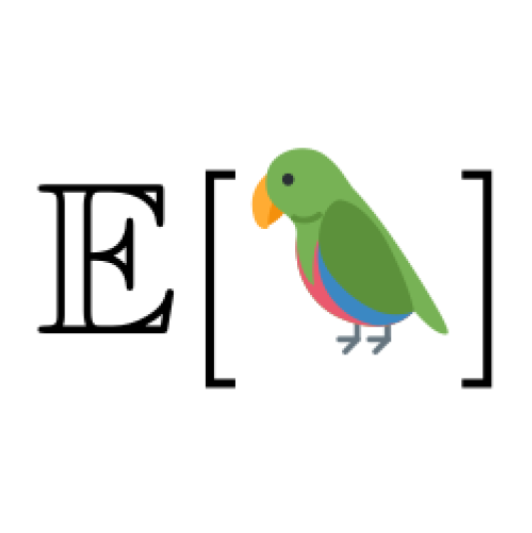

In [9]:
file.view()

In [10]:
survey = Survey([q1,q2])

In [16]:
survey.push(visibility = "public", description = "Image labeling example", alias = "image-labeling-example")

key,value
description,Image labeling example
object_type,survey
url,https://www.expectedparrot.com/content/4bfa20c3-ce54-402b-9532-f27ffb0102ac
alias,image-labeling-example
alias_url,https://www.expectedparrot.com/content/johnhorton/image-labeling-example
uuid,4bfa20c3-ce54-402b-9532-f27ffb0102ac
version,1.0.5.dev1
visibility,public


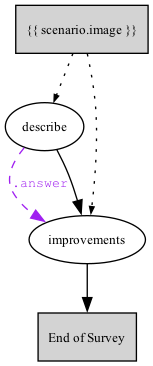

In [15]:
survey.show_flow()

In [11]:
# creating a scenario
s = Scenario({
    "image":file,
    "image_id":"parrot" # metadata for results
})

In [12]:
results = survey.by(s).by(m).run()

In [13]:
results.columns

0
agent.agent_index
agent.agent_instruction
agent.agent_name
answer.describe
answer.improvements
cache_keys.describe_cache_key
cache_keys.improvements_cache_key
cache_used.describe_cache_used
cache_used.improvements_cache_used
comment.describe_comment


In [14]:
results.select("model", "image_id", "describe", "improvements")

model.model,scenario.image_id,answer.describe,answer.improvements
gemini-2.5-flash,parrot,"The image features a combination of mathematical notation and an emoji on a plain white background. On the far left, there is a large, black, double-struck capital letter **E** (often used in mathematics to denote expected value, \$\mathbb{E}\$). Immediately to its right is a black opening square bracket **[**. Centered within the brackets is an emoji-style parrot. The parrot is predominantly green, with a bright orange beak and small black eyes. It has patches of pink and blue on its chest/belly and small grey feet. The parrot is facing right and appears to be standing. To the right of the parrot is a black closing square bracket **]**. The overall arrangement resembles the mathematical expression ""E[parrot]"" or ""Expected Value of Parrot.""","The current description is quite good, providing a clear and sequential breakdown of the image's elements. However, it could be improved by adding a bit more detail, refining some phrasing for conciseness or precision, and explicitly mentioning the relative sizing and alignment of the elements. Here are some ways the description could be improved, categorized by type of enhancement: 1. **Adding More Visual Detail:**"
